In [2]:
import pandas as pd
import matplotlib.pyplot as py
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

#inferences-
#1. some values in Loanamount, loanamountterm and credit history is missing.
#2. mean>median, rightwards skew.
#If skew present operations can't be executed directly. Data needs to be cleaned first.
#4. Since mean of credit history column is 0.842 with binary values of 1 and 0, 84.2% people have a credit history.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.shape

(614, 13)

In [7]:
df['Property_Area'].value_counts() #frequency table

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

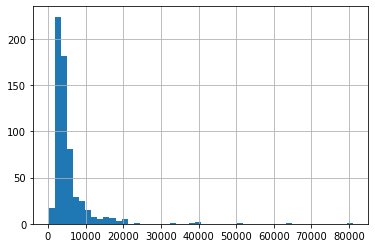

In [8]:
"""Inference- Most applicants are from Urban and semi-urban area."""
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

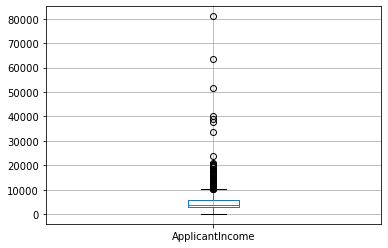

In [9]:
"""Inference-Bulk of applicants have income less than 10000"""
df.boxplot(column='ApplicantIncome')


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

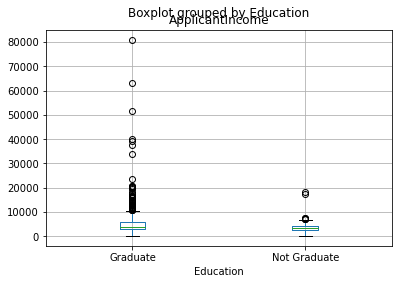

In [10]:
"""The two black linnes show maximum and minimum value, the box shows 1st and 3rd quartile, the green line shows 50 percentile"""
df.boxplot(column='ApplicantIncome',by ='Education')

In [11]:
"""Inference- if a person is a graduate, the person has a higher chance of earning substantially more money than non- graduates."""

'Inference- if a person is a graduate, the person has a higher chance of earning substantially more money than non- graduates.'

<AxesSubplot:>

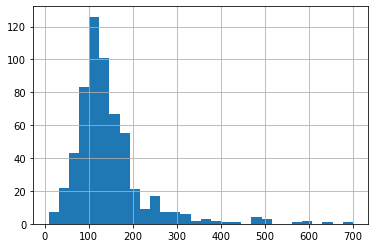

In [12]:
df["LoanAmount"].hist(bins=30)

<AxesSubplot:>

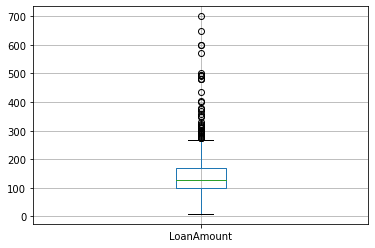

In [13]:
"""Positive skew"""
df.boxplot(column='LoanAmount')

In [14]:
temp1 = df['Credit_History'].value_counts(ascending=True) 
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()) 
print ('Frequency Table for Credit History:' )
print (temp1 )
print ('\nProbility of getting loan for each Credit History class:' )
print( temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


<AxesSubplot:title={'center':'Probability of getting loan by credit history'}, xlabel='Credit_History', ylabel='Probability of getting loan'>

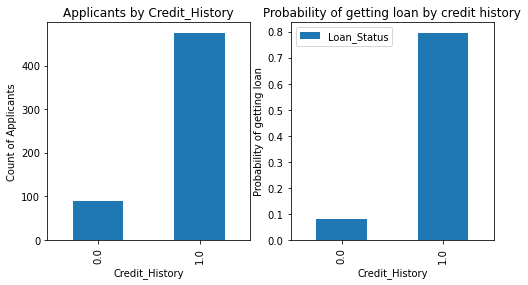

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar',ax=ax1)

ax2 = fig.add_subplot(122)

ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind = 'bar',ax=ax2)

<AxesSubplot:xlabel='Credit_History'>

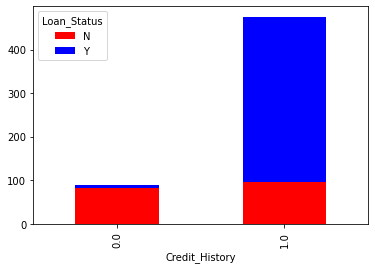

In [16]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status']) 
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Applicants with good credit history were considered compared those with poor credit history

In [17]:
#DATA MUNGING using pandas.
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df.shape

(614, 13)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
#close to 25% data is missing. Hence can't delete data. Replacing values:
#Only one numerical column- loan amount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df['Self_Employed'].mode()

0    No
dtype: object

In [23]:
df['Self_Employed'].value_counts()
df['Self_Employed'].fillna('No',inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df['Gender'].mode()

0    Male
dtype: object

In [97]:
df['Gender'].value_counts()
df['Gender'].fillna('Male',inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [99]:
df['Dependents'].fillna("0",inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [101]:
df['Married'].fillna('yes',inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [102]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [103]:
df['Loan_Amount_Term'].fillna("360.0",inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
df['Credit_History'].value_counts()
df['Credit_History'].fillna("360.0",inplace=True)
df.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

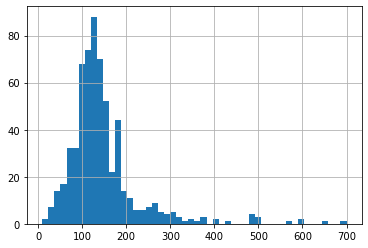

In [105]:
#TREATING FOR EXTREME VALUES
df['LoanAmount'].hist(bins=50)

In [110]:
#using log-trasformation to normalise the data.
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:>

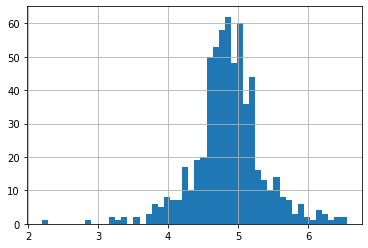

In [111]:
df['LoanAmount_log'].hist(bins=50)

In [112]:
#As it can be seen, the distribution has become much more normalised.

<AxesSubplot:>

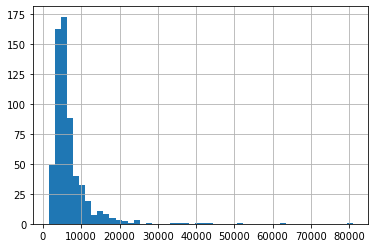

In [113]:
#Merging two columns into one for efficiency- Feature extraction
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].hist(bins=50)

<AxesSubplot:>

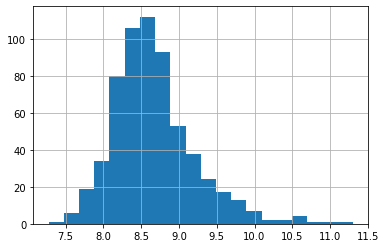

In [114]:
#using log-trasformation to normalise the data.
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)
#DATA MUNGING COMPLETED

In [115]:
#MODELLING using scikit-learn

In [116]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [117]:
df.isnull().sum() 
#to check whether any NaN values are present.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [118]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in var_mod:
    df[i] = le.ﬁt_transform(df[i].astype(str))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [119]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


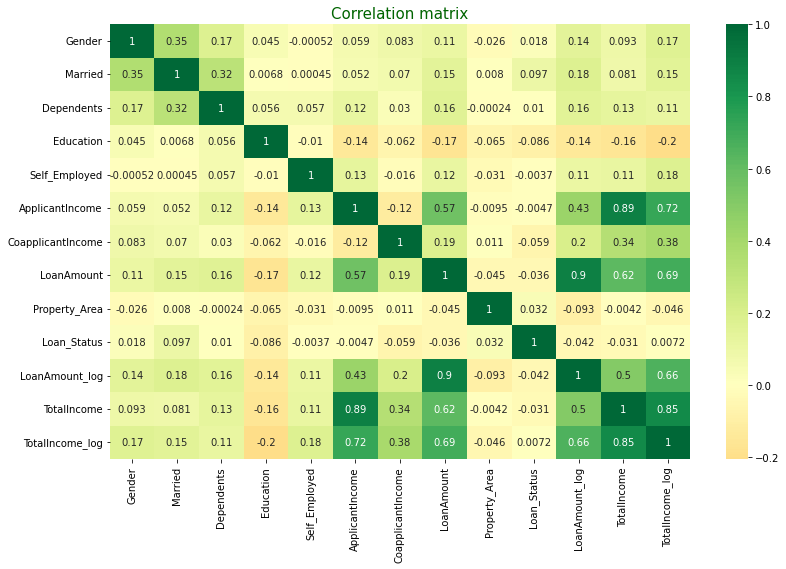

In [120]:
#Correlation plot
# Quantify correlations
corr = df.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlation matrix', fontsize = 15, color = 'darkgreen')
plt.show()

## Modeling

In [121]:
#importing ML Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 

In [122]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [123]:
xfeatures = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log']

In [124]:
yfeature = ['LoanAmount']

In [125]:
X = df[xfeatures]
y = df[yfeature]

In [127]:
X.shape, y.shape

((614, 14), (614, 1))

In [131]:
# Training and test splits
# Split train_data to train and test splits
# Test : 20% Train : 80%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Linear Regressor

In [137]:
np.random.seed(42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [138]:
#Prediction on test data
ypredicted = model.predict(X_test)

In [139]:
metrics.mean_squared_error(y_test, ypredicted)

919.4291884746107

In [140]:
metrics.mean_absolute_error(y_val, ypredicted)

15.222216776531596

## RandomForestRegressor

In [155]:
np.random.seed(42)
rfr = RandomForestRegressor(n_estimators=50)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [156]:
rfr.n_estimators

50

In [157]:
ypredicted = rfr.predict(X_val)

In [158]:
metrics.mean_squared_error(y_val, ypredicted)

14.666620138876528

In [159]:
metrics.mean_absolute_error(y_val, ypredicted)

1.0888694792353355

In [160]:
#Experimental
 #- Changing the number trees in random forest from 100 to 50 reduces the error rate
 # - Removing multicolinearity improves the performance - [Applicants income - remove]